# Machine Learning

- This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

## Importing Libraries and Data and Renaming Columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that b

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\TEDWI\OneDrive\Project 6'

In [4]:
Store = pd.read_pickle(os.path.join(path, 'df_store_new.pkl'))

In [5]:
Store.shape

(9789, 17)

In [6]:
Store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
Store = Store.drop(columns = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment','Country',
           'City', 'State', 'Product ID', 'Category', 'Sub-Category', 'Product Name'], axis=1)

In [8]:
#columns do not require renaming

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(Store).score(Store) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\clust

[-10052579432696.377,
 -1759256709821.115,
 -737291910929.4628,
 -404778453107.5272,
 -256331554168.03305,
 -161774965436.86386,
 -102678801734.66176,
 -75564278068.11218,
 -63768882801.93599]

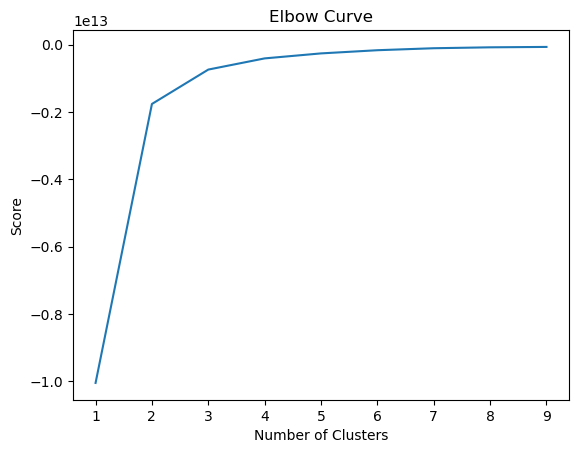

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#I chose three because the elbow curve  shows an increase from two to three on the x-axis, the line then becomes constant as the curve straightens out. This means that the optimal count for the clusters is three.

## 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(Store)

C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
Store['clusters'] = kmeans.fit_predict(Store)

C:\Users\TEDWI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
Store.head()

,Postal Code,Sales,clusters
0,42420.0,261.9600,0
1,42420.0,731.9400,0
2,90036.0,14.6200,1
3,33311.0,957.5775,0
4,33311.0,22.3680,0


In [16]:
Store['clusters'].value_counts()

1    4315
2    2935
0    2539
Name: clusters, dtype: int64

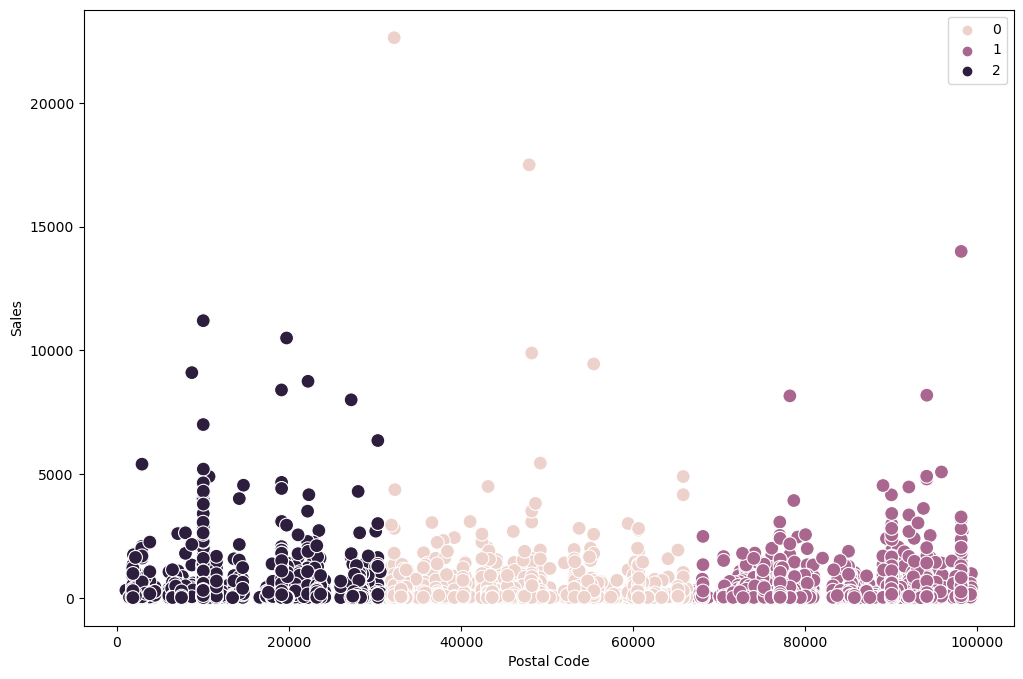

In [22]:
# Plot the clusters for the "Postal Code" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Store['Postal Code'], y=Store['Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Postal Code') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

In [23]:
Store.loc[Store['clusters'] == 2, 'cluster'] = 'dark purple'
Store.loc[Store['clusters'] == 1, 'cluster'] = 'pink'
Store.loc[Store['clusters'] == 0, 'cluster'] = 'purple'

In [24]:
Store.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Postal Code':['mean', 'median']})
                         

Sales           Postal Code         
                  mean  median          mean   median
cluster                                              
blue        213.742298  54.320  87463.569641  90036.0
dark blue   227.627833  51.264  46591.076408  45014.0
light blue  256.341509  58.340  15458.435094  13601.0

#### Cluster thoughts
#cluster 0 had the majority of the least sales but it also had a lot of outliers.

#### How will the cluters help with future analysis
They helped indentified some differentiation between the postal codes. However, most of my data is categorical and clusters are not advantageous to my data set.